## Bibliotecas

In [ ]:
# Import libs (Rodar sempre)

import pandas as pd
import numpy as np
from datetime import datetime

## Configuração


In [ ]:
pd.set_option('display.max_columns', 100)

## Import datasets

In [ ]:
# Import datasets (Rodar sempre)

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

# Tornados [1950 - 2022]
# NOAA's National Weather Service Storm Prediction Center
dataset_name_tornados = 'tornados.csv'
dataset_name_tornados_path = 'gdrive/MyDrive/datasets/'+dataset_name_tornados

#Initialize dataframe
sample_tornados = pd.read_csv(dataset_name_tornados_path)

tornados_df = sample_tornados

## Tornados [1950 - 2022]
### NOAA's National Weather Service Storm Prediction Center

link: https://www.kaggle.com/datasets/sujaykapadnis/tornados

ref link: https://www.spc.noaa.gov/wcm/#data


In [ ]:
tornados_df

## Data Structure

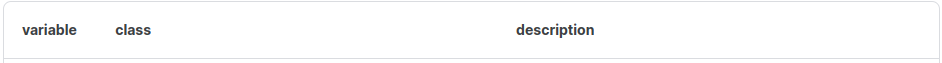

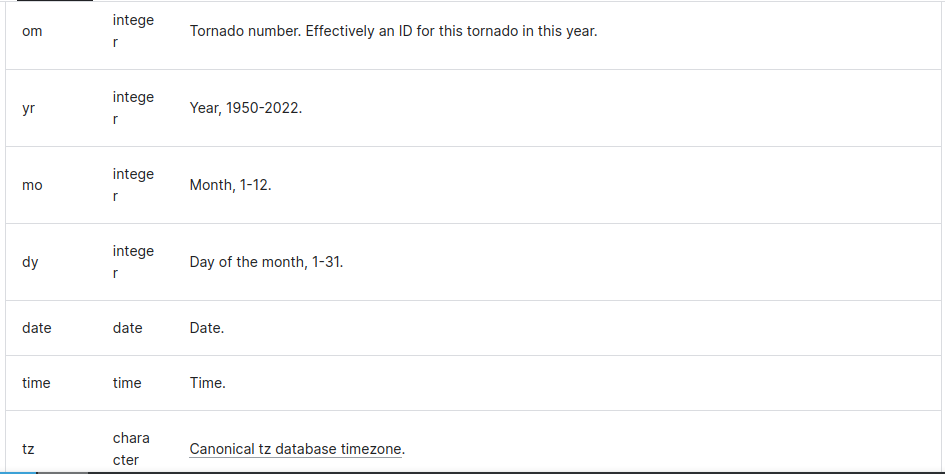

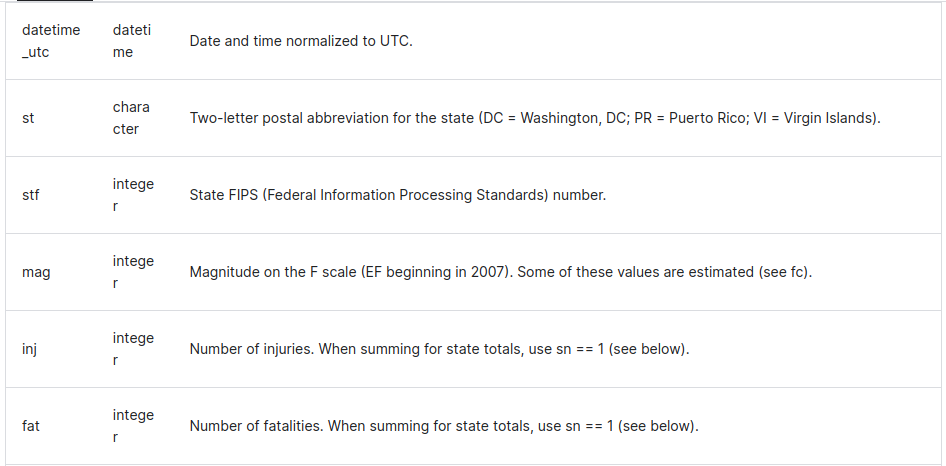

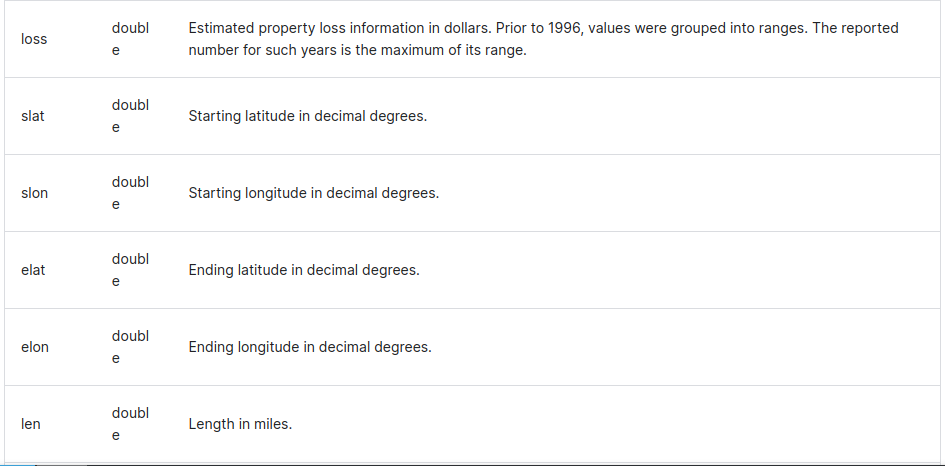

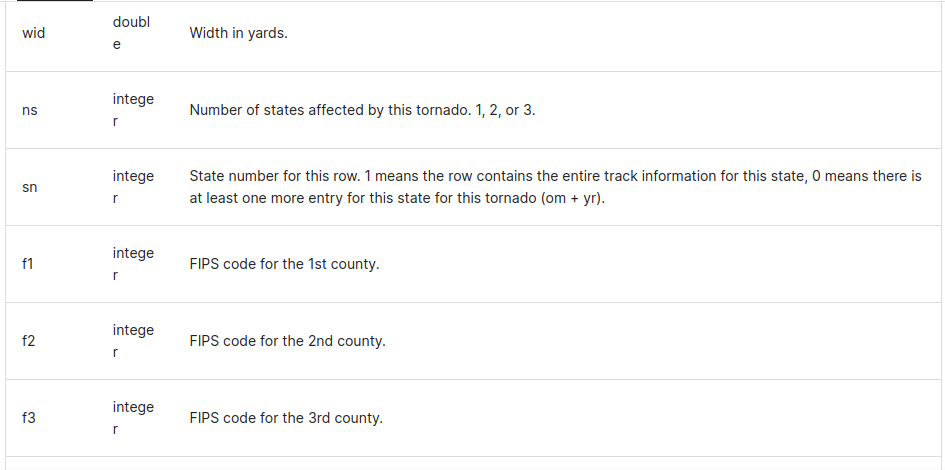

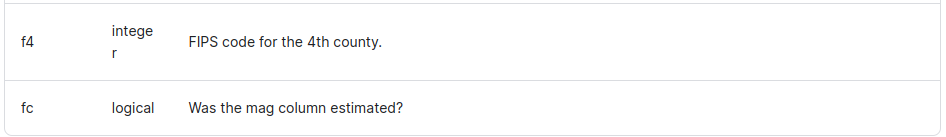

## Algumas informações sobre furacões:

- Prescindido e sucedido pelas chuvas

- Ar quente sobe para a atmosfera diminuindo a pressão.

- A pressão atmosferica junta o corrente de ar em um ponto e é jogada para cima de forma que o ar começa a se concentrar de forma ciclica.

- Dependendo da intensidade ele pode ir até mais longe.

- Furacões se formam.

- Furacões ficam fracos quando perdem sua fonte de calor (mar do golfo do méxico)

- Ciclone: Vento em baixa pressão também em ascenção em sentido ciclico.

- Furacão: Maior e se forma no oceano.

- Tornado: Menor e mais fraco, se forma no continente.

- Tufão: Chamado de furacão da ásia.

- Em geral são zonas de baixa pressão atmosferica.

- Ele sempre roda em um sentido e se desloca no outro.

- Hemisfério Norte: Roda em sentido anti-horário e se desloca em sentido horário.

- Hemisfério Sul: Roda em sentido horário e se desloca em sentido anti-horário.

#Informações e Utilitários

In [ ]:
tornados_df_columns = list(tornados_df.columns)
tornados_df_size = len(tornados_df_columns) # total de tornados contados 1950-2022

print("linhas do dataframe: ", tornados_df_columns)
print("Quantidade de linhas tabela: ", tornados_df_size)

tornadoes_allyrs = tornados_df.yr.value_counts(sort=False) # lista todos os tornados dos anos 1950-2022
anos_mais_tornados = tornados_df.yr.value_counts(sort=True)[0:5] # lista contando 5 anos com mais tornados
locais_mais_tornados = tornados_df.st.value_counts(sort=True)[0:5] # 5 lugares com mais tornados de 1950-2022 EUA
total_feridos = tornados_df.inj.sum() # total feridos
total_fatalidades = tornados_df.fat.sum() # total de fatalidades
total_perda_monetaria = tornados_df.loss.sum() # total de fatalidades
#tornadoes_2004 = tornados_df[tornados_df['yr'] == 2004].count() conta quantidade ano especifico


print(total_fatalidades)

# Análises

## Probabilidade Simples

Tendo em vista os resultados obtidos das analises simples em informações e utilitários podemos tirar conclusões baseadas em probabilidades simples. Com essas informações generalizaremos a nivel de informação e especificarei em anos de mais intensidade.

No primeiro bloco está disponibilizado respectivamente em ordem de estados com mais tornados desde 1950.

Ao segundo bloco há informações sobre a chance de a vítima de um tornado ser um ferido fatal, medindo assim o indice de fatalidade dos tornados até hoje.

![image](https://cdn.discordapp.com/attachments/1157468114691301497/1157695762591912026/1993-2022-stateavgtornadoes.png?ex=65198bb2&is=65183a32&hm=c3c14175f8d186073bf64a429cfe943001d8e44d14d25c7762ced669b666f17e&)

In [ ]:
probabilidade_tornado_texas = tornados_df[tornados_df['st'] == 'TX']
probabilidade_tornado_kansas = tornados_df[tornados_df['st'] == 'KS']
probabilidade_tornado_oklahoma = tornados_df[tornados_df['st'] == 'OK']
probabilidade_tornado_florida = tornados_df[tornados_df['st'] == 'FL']
probabilidade_tornado_nebraska = tornados_df[tornados_df['st'] == 'NE']

numero_tornado_texas = tornados_df[tornados_df['st'] == 'TX'].shape[0]
numero_tornado_kansas = tornados_df[tornados_df['st'] == 'KS'].shape[0]
numero_tornado_oklahoma = tornados_df[tornados_df['st'] == 'OK'].shape[0]
numero_tornado_florida = tornados_df[tornados_df['st'] == 'FL'].shape[0]
numero_tornado_nebraska = tornados_df[tornados_df['st'] == 'NE'].shape[0]


print("Aqui há os 5 estados com mais presença de tornados em ordem de mais tornados para menos tornados")
print("Dentre todos os tornados já registrados desde 1950, qual a probabilidade de terem ocorrido para cada estado americano")
print(f"Texas: {round(numero_tornado_texas / tornadoes_allyrs.sum() * 100, 2)}%, total de {numero_tornado_texas} tornados no Texas")
print(f"Kansas: {round(numero_tornado_kansas / tornadoes_allyrs.sum() * 100, 2)}%, total de {numero_tornado_kansas} tornados no Kansas")
print(f"Okalhoma: {round(numero_tornado_oklahoma / tornadoes_allyrs.sum() * 100, 2)}%, total de {numero_tornado_oklahoma} tornados no Oklahoma")
print(f"Florida: {round(numero_tornado_florida / tornadoes_allyrs.sum() * 100, 2)}%, total de {numero_tornado_florida} tornados no Florida")
print(f"Nebraska: {round(numero_tornado_nebraska / tornadoes_allyrs.sum() * 100, 2)}%, total de {numero_tornado_nebraska} tornados no Nebraska")
print(f"Total de tornados registrados desde 1950: {tornadoes_allyrs.sum()}")

In [ ]:
print(f"Total de danos monetários: U$ {total_perda_monetaria:,}")
print(f"Probabilidade de prejuízo/ano: U$ {round(total_perda_monetaria / (2022 - 1950), 2):,}")

In [ ]:
print(f"Total de feridos: {total_feridos}")
print(f"Total de fatalidades: {total_fatalidades}")
print(f"Feridos/ano: {round(total_feridos / (2022 - 1950), 2)}")
print(f"Fatalidades/ano: {round(total_fatalidades / (2022 - 1950), 2)}")
print(f"Chance de feridos fatais: {round(total_fatalidades / total_feridos * 100, 2)}%")

## Probabilidade com união


In [ ]:
top_3_estados_mais_atingidos = tornados_df.st.value_counts(sort=True)[0:3]
print("TOP 3 estados mais atingidos: ", list(top_3_estados_mais_atingidos.index[0:3]))


# Qual a probabilidade de um tornado ter atingido o Texas entre 1950 e 2022 (TX)
probabilidade_tornado_texas = round((tornados_df[tornados_df['st'] == 'TX'].shape[0] / tornadoes_allyrs.sum()) * 100, 2)
print("Probabilidade de um tornado ter atingido o Texas entre 1950 e 2022 (TX)",probabilidade_tornado_texas, "%")

# Qual a probabilidade de um tornado ter atingido Kansas entre 1950 e 2022 (KS)
probabilidade_tornado_kansas = round((tornados_df[tornados_df['st'] == 'KS'].shape[0] / tornadoes_allyrs.sum()) * 100, 2)
print("Probabilidade de um tornado ter atingido Kansas entre 1950 e 2022 (KS)",probabilidade_tornado_kansas, "%")

# Qual a probabilidade de um tornado ter atingido Oklahoma entre 1950 e 2022 (OK)
probabilidade_tornado_oklahoma = round((tornados_df[tornados_df['st'] == 'OK'].shape[0] / tornadoes_allyrs.sum()) * 100, 2)
print("Probabilidade de um tornado ter atingido Oklahoma entre 1950 e 2022 (OK)", probabilidade_tornado_oklahoma,"%")

print("")

quantidade_tornado_tx_ks_ok = tornados_df[(tornados_df['st'] == 'KS') | (tornados_df['st'] == 'TX') | (tornados_df['st'] == 'OK')].shape[0]
print("Quantidade de tornados em TX, KS e OK entre 1950 e 2022:", quantidade_tornado_tx_ks_ok)

probabilidade_tornado_tx_ks_ok = round((quantidade_tornado_tx_ks_ok / tornadoes_allyrs.sum()) * 100, 2)
print("Qual a probabilidade de um tornado ter ocorrido em TX ou KS ou OK entre 1950 e 2022?", probabilidade_tornado_tx_ks_ok, "%")

Existem alguns motivos para que o Texas, Kansas e Oklahoma sejam atingidos muitas vezes ao longo do tempo por tornados:

- O mar do Golfo do México acumula calor durante o verão, liberando esse calor na atmosfera criando baixa pressão.

- Esse ar quente e úmido do Golfo do México é levado ao corredor dos tornados. (Como mostrado na imagem abaixo)

![imagem](https://upload.wikimedia.org/wikipedia/commons/e/ee/Significant_tornado_alley.gif)

- Além de ventos frios que vem das montanhas do texas colidindo com o calor que vem pela corrente originaria do golfo do méxico.

- Resultando então em tornados com mais incidência nessas 3 regiões como mostra na foto comparando o percurso do ar quente desde o golfo do méxico até as áreas citadas em 2004 e 2005:
![image](https://www.ustornadoes.com/wp-content/uploads/2012/08/Ivan_Dennis.jpg)

Outra imagem que mostra o corredor dos tornados mostrando toda trajetória de choque de correntes:

![image](https://i.pinimg.com/originals/d8/26/b4/d826b47eb93785f21e937cb59fdf3bc7.gif)


Tudo isso justifica o motivo de entre 1950 e 2022 esses 3 estados juntos 1/4 (25,97%) de chance de ter tornados que os outros 47 estados dos estados unidos.

refs:

- https://www.usnews.com/news/best-states/articles/2021-12-17/the-states-with-the-most-tornadoes

- https://rainbowrestores.com/blog/why-so-many-tornadoes-in-tornado-alley

- https://science.howstuffworks.com/nature/climate-weather/storms/tornado-alley.htm





## Probabilidade com intersecção

Em 2011, um dos anos em que teve mais incidencia de tornados (1950 - 2022), calcularemos a probabilidade de um tornado vir do texas, estado com maior incidencia de tornados, devido a sua localização e geografia tangente, e a probabilidade de uma vítima fatal vir dessas ocorrências. A geografia tangente ao texas engloba o golfo do méxico e as montanhas rochosas ao centro dos Estados Unidos, provendo o ambiente ideal para tornados.

In [ ]:
media_tornados = tornadoes_allyrs.sum() / (2022 - 1950)
torn_texas_2011 = len(tornados_df[(tornados_df['st'] == 'TX') & (tornados_df['yr'] == 2011)]) / len(tornados_df[tornados_df['yr'] == 2011])
fattexas_2011 = (len(tornados_df[(tornados_df['st'] == 'TX') & (tornados_df['fat'])]) / len(tornados_df[tornados_df['yr'] == 2011]))

print("A probabilidade de um tornado ocorrer no texas e em 2011, ano de maior incidente de tornados da base de dados:")
print(f"{round(torn_texas_2011 * 100, 2)} %")
print("A probabilida de um tornado, em 2011 ter uma vitima fatal e vir do texas:")
print(f"{round(fattexas_2011 * 100, 2)} %")

## Probabilidade com complemento

In [ ]:
# Qual o ano com mais ocorrências de tornados?
ano_mais_tornados_selected = tornados_df.yr.value_counts(sort=True)[0:1]

perda_monetaria_2004 = tornados_df['loss'] # sum()
tornados_2004 = tornados_df[tornados_df['yr'] == 2004] # sum()
media_tornados = tornadoes_allyrs.sum() / (2022 - 1950)
torn_texas_2004 = len(tornados_df[(tornados_df['st'] == 'TX') & (tornados_df['yr'] == 2004)]) / len(tornados_df[tornados_df['yr'] == 2004])
fattexas_2004 = (len(tornados_df[(tornados_df['st'] == 'TX') & (tornados_df['fat'])]) / len(tornados_df[tornados_df['yr'] == 2004]))

ano_mais_tornados = ano_mais_tornados_selected.index[0]
quantidade_tornados_2004 = ano_mais_tornados_selected.values[0]

print("O ano com mais tornados foi: ", str(ano_mais_tornados)+",", "somando", quantidade_tornados_2004, "tornados.")
print("Nenhum ano até então superou a quantidade de tornados de 2004.")

torn_foratexas_2004 = 1 - torn_texas_2004
torn_fatforatexas_2004 = 1 - fattexas_2004

print("A probabilidade de ocorrer um tornado nos EUA, sendo ele fora do estado do Texas")
print(f"{round(torn_foratexas_2004 * 100, 2)}%")
print("A probabilidade de uma fatalidade decorrente dos tornados nos EUA vir de fora do Texas")
print(f"{round(torn_fatforatexas_2004 * 100, 2)}%")

Se fizermos uma rápida pesquisa na Internet pelo ano do ocorrido a respeito dos tornados no ano de 2004, iremos ver coisas como:

"The largest number of tornadoes to touch down in any 24-hour period came in what is known as "The Super Outbreak," which began in the afternoon of April 3, 1974, and continued for 23 hours."

"Officials at the NOAA Storm Prediction Center, which compiles statistics on twisters, said a total of 1,717 tornadoes were reported in 2004, compared with 1,424 in 1998 and 1,368 last year."

![image](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse3.mm.bing.net%2Fth%3Fid%3DOIP.Y8fFGSOX_CZjslnmovKssAHaCo%26pid%3DApi&f=1&ipt=4ff329c85d11046a13e070cb1d6411dd7b96a3b24282b3ee1c10b3b749733478&ipo=images)

refs:
- https://edition.cnn.com/2004/WEATHER/05/30/weather.tornadoes/
- https://www.upi.com/Science_News/2004/12/30/Record-number-of-tornadoes-in-2004/81691104435368/

In [ ]:
#Em todos outros anos (com exceção de 2004), qual a soma de todos os tornados?
soma_tornado_todos_anos = tornadoes_allyrs.values.sum()

soma_tornados_todos_anos_sem_2004 = soma_tornado_todos_anos - quantidade_tornados_2004

print("Quantidade de tornados ao longo dos anos (1950 - 2022): ", soma_tornado_todos_anos)
print("Quantidade de tornados ao longo dos anos com exceção de 2004: ", soma_tornados_todos_anos_sem_2004)

porcentagem_de_tornados_em_2004_relacionado_a_todos_anos = round((quantidade_tornados_2004 / soma_tornado_todos_anos) * 100, 2)

porcentagem_de_tornados_em_todos_anos_sem_2004 = round((soma_tornados_todos_anos_sem_2004 / soma_tornado_todos_anos) * 100, 2)

print("Porcentagem de soma de tornados em 2004: ", porcentagem_de_tornados_em_2004_relacionado_a_todos_anos, "%")
print("Porcentagem de soma de tornados todos anos (Sem 2004): ", porcentagem_de_tornados_em_todos_anos_sem_2004, "%")


print("Qual a probabilidade ")

torn_foratexas_2004 = 1 - torn_texas_2004
torn_fatforatexas_2004 = 1 - fattexas_2004

print("A probabilidade de ocorrer um tornado nos EUA, sendo ele fora do estado do Texas")
print(f"{round(torn_foratexas_2004 * 100, 2)}%")

print("A probabilidade de uma fatalidade decorrente dos tornados nos EUA vir de fora do Texas")
print(f"{round(torn_fatforatexas_2004 * 100, 2)}%")

## Probabilidade da diferença

Com os dados que extraímos da base até o momento, podemos inferir então por meio da probabilidade da diferença a quantidade de vitimas que vieram de fora dos 3 principais estados com incidencia de tornados.

In [ ]:
vit_fora_tres = tornados_df[((tornados_df['inj'] > 0) | (tornados_df['fat'] > 0)) & ((tornados_df['st'] != 'TX') & (tornados_df['st'] != 'KS') & (tornados_df['st'] != 'OK'))]
vit_total = tornados_df[(tornados_df['inj'] > 0) | (tornados_df['fat'] > 0)]
probab_fora_tres = len(vit_fora_tres) / len(vit_total)

print("A probabilidade das vitimas virem de fora dos três estados com mais incidência de tornados é de:")
print(f"{round(probab_fora_tres * 100, 2)}%")

## Probabilidades condicional



Os tornados ao longo do tempo sempre causam muitas destruições, machucam pessoas ou viram a causa de seu óbito.

O verão nos Estados Unidos da America é entre Junho e Agosto.

In [ ]:
#Qual o mês com mais incidência de tornados ao longo dos anos.

# tornado_mes_ao_longo_dos_anos = tornado_df.

# Agrupar os dados por mês e frequência de tornados em cada mês
meses_com_mais_tornados = tornados_df.groupby('mo')['om'].count().reset_index()

# Renomeie as colunas para facilitar a interpretação
meses_com_mais_tornados.columns = ['Mês', 'Contagem de Tornados']

# Ordenar os meses pela contagem de tornados em ordem decrescente
meses_com_mais_tornados = meses_com_mais_tornados.sort_values(by='Contagem de Tornados', ascending=False)

# Exibir os meses com mais incidência de tornados
print(meses_com_mais_tornados.head())

print()

# O mês com mais incidência de tornados ao longo dos anos (1950-2022)
mes_com_mais_tornados = meses_com_mais_tornados['Mês'].values[0]
print("O mês com mais incidência de tornados ao longo dos anos (1950-2022) é MAIO", "("+str(mes_com_mais_tornados)+")")

# Qual a probabilidade de 2 pessoas ou mais ficarem feridas durante tornados se o mês for MAIO.
quantidade_2_injuri_em_maio_ao_longo_do_tempo = tornados_df[(tornados_df['mo'] == 5) & (tornados_df['inj'] >= 2)].shape[0]

prob_2_injuri_em_maio = round((quantidade_2_injuri_em_maio_ao_longo_do_tempo / tornadoes_allyrs.sum()) * 100, 2)

print("Qual a probabilidade de 2 pessoas ou mais ficarem feridas durante tornados se o mês for MAIO?", prob_2_injuri_em_maio, "%")

O resultado desta analise mostra que: o número de feridos é baixo já que o país se organiza para antecipar os eventos.

Um dos métodos que é utilizado é o Wireless Emergency Alert (WEA), que notifica o celular de todas pessoas da região antes do evento ocorrer.


refs:
- https://www.fema.gov/emergency-managers/practitioners/integrated-public-alert-warning-system/public/wireless-emergency-alerts

## Probabilidade com o teorema de Bayes

In [ ]:
total_tornados = tornados_df.shape[0]
probabilidade_A = tornados_df['fat'].sum() / total_tornados  # Probabilidade de um tornado causar fatalidades
probabilidade_B = (tornados_df['mag'] >= 3).sum() / total_tornados  # Probabilidade de um tornado ser de categoria F3 ou superior

# Calcule a probabilidade condicional usando o teorema de Bayes
tornados_f3_ou_superior = tornados_df[tornados_df['mag'] >= 3]
probabilidade_B_dado_A = (tornados_f3_ou_superior['fat'].sum() / total_tornados)  # Probabilidade de ser F3+ dado que causou fatalidades
probabilidade_A_dado_B = round(((probabilidade_B_dado_A * probabilidade_A) / probabilidade_B) * 100, 2)

print("A probabilidade de um tornado causar fatalidades dado que é de categoria F3+ é: ", probabilidade_A_dado_B, "%")

Numa matéria recente podemos atestar que quanto maior a magnitude com mais facilidade o tornado causará mortes fatais.

“Large hail and damaging winds will be the main threats initially, but the tornado potential should increase toward and after sunset, when low-level shear will considerably increase.” the Storm Prediction Center said. “This includes the potential for long-lived supercells and strong tornadoes (EF2+).”

A tornado watch is also in effect until 1 a.m. local time in much of central and southern Alabama, including Birmingham and Montgomery.

A ‘city is gone’ after a catastrophic tornado hits Mississippi
An EF-4 tornado flattened much of Rolling Fork, which endured maximum wind gusts of 170 miles per hour, weather service meteorologist Bill Parker said.

EF-4 and EF-5 tornadoes are considered violent and extremely rare, and make up only about 1% of all tornadoes, according to the National Oceanic and Atmospheric Administration.

refs:
- https://edition.cnn.com/2023/03/26/weather/us-severe-storms-sunday/index.html

## Definição de novas variáveis aleatórias

Aqui definiremos as novas variáveis aleatórias como o local de inicio do tornado ("lcl_beg") e local de fim ("lcl_end") dos tornados em si.

Também a coluna ("tar") que é a área do tornado (3,14*r²) em m².

Além destas, a coluna ("vic"), que mostra, independente de ser ferido ou vitima fatal a quantidade total de vitimas do incidente.

In [ ]:
tornados_df['lcl_beg'] = tornados_df.apply(lambda row: str(row['slat']) + ' ' + str(row['slon']), axis=1)
tornados_df['lcl_end'] = tornados_df.apply(lambda row: str(row['elat']) + ' ' + str(row['elon']), axis=1)
tornados_df['tar'] = round((tornados_df['wid'] * 0.91 / 2) * (tornados_df['wid'] * 0.91 / 2) * 3.14, 2)
tornados_df['vic'] = tornados_df['inj'] + tornados_df['fat']


tornados_df.head(10)

## Função probabilidade

In [ ]:
tornados_df['vic'].value_counts()
tornados_df['vic'].value_counts(sort=False).sort_index()
tornados_df['vic'].sum()

print("A função de probabilidade de quantidade de vitimas, feridas ou fatais é de: ")
func_prob = tornados_df['vic'].value_counts(sort=False).sort_index() / tornados_df['vic'].sum()
func_prob

## Função repartição (cumulativa)

In [ ]:
func_prob.cumsum()